In [1]:
import rebound

In [2]:
# clear discards file
import os
discard_file_name = "discards1.txt"

try:
    os.remove(discard_file_name)
except:
    pass

In [3]:
sim = rebound.Simulation()
sim.integrateor = "mercurius"
sim.units = ("yr", "AU", "Msun")

In [4]:
date = "2024-06-25 01:36" 

In [5]:
sim.add("Sun", date=date, hash=0)

Searching NASA Horizons for 'Sun'... 
Found: Sun (10) 


In [6]:
h = rebound.hash
print("Mass of the Sun = {}".format(sim.particles[h(0)].m))

Mass of the Sun = 0.9999999999950272


In [7]:
print("GM = {}".format(sim.G*sim.particles[h(0)].m))

GM = 39.47692642117669


In [8]:
sim.particles[h(0)].r = 0.0046524726

In [9]:
sim.add("Venus", hash=1)
sim.add("Earth", hash=2)
sim.add("Mars", hash=3)
sim.add("Jupiter", hash=4)
sim.add("Saturn", hash=5)
sim.add("Uranus", hash=6)
sim.add("Neptune", hash=7)

Searching NASA Horizons for 'Venus'... 
Found: Venus Barycenter (299) (chosen from query 'Venus')
Searching NASA Horizons for 'Earth'... 
Found: Earth-Moon Barycenter (3) (chosen from query 'Earth')
Searching NASA Horizons for 'Mars'... 
Found: Mars Barycenter (4) (chosen from query 'Mars')
Searching NASA Horizons for 'Jupiter'... 
Found: Jupiter Barycenter (5) (chosen from query 'Jupiter')
Searching NASA Horizons for 'Saturn'... 
Found: Saturn Barycenter (6) (chosen from query 'Saturn')
Searching NASA Horizons for 'Uranus'... 
Found: Uranus Barycenter (7) (chosen from query 'Uranus')
Searching NASA Horizons for 'Neptune'... 
Found: Neptune Barycenter (8) (chosen from query 'Neptune')


In [10]:
sim.particles[h(1)].r = 0.00004045
sim.particles[h(2)].r = 0.00004259
sim.particles[h(3)].r = 0.00002266
sim.particles[h(4)].r = 0.00046733
sim.particles[h(5)].r = 0.00038926
sim.particles[h(6)].r = 0.00016953
sim.particles[h(7)].r = 0.00016459

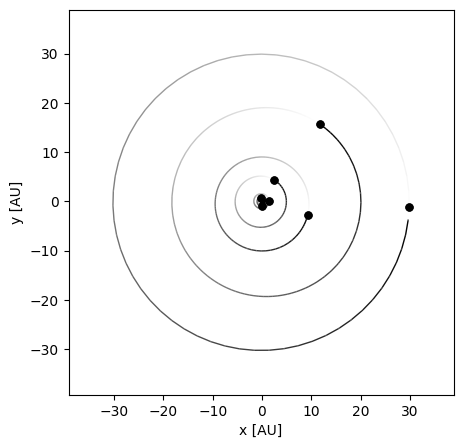

In [11]:
rebound.OrbitPlot(sim, unitlabel="[AU]")

In [12]:
sim.status()

---------------------------------
REBOUND version:     	4.4.1
REBOUND built on:    	May  7 2024 19:45:53
Number of particles: 	8
Selected integrator: 	ias15
Simulation time:     	0.0000000000000000e+00
Current timestep:    	0.001000
---------------------------------
<rebound.particle.Particle object at 0x25d296464d0, m=0.9999999999950272 x=-0.006996076514134355 y=-0.0040250558070854675 z=0.00019863851999010358 vx=0.002251535520503117 vy=-0.002033708882019127 vz=-3.198278533676416e-05>
<rebound.particle.Particle object at 0x25d296462d0, m=2.447838287784771e-06 x=-0.2191547918333883 y=0.6825088358383847 z=0.021868990790396836 vx=-7.080682875581747 vy=-2.224477991578594 vz=0.3781371449816307>
<rebound.particle.Particle object at 0x25d296464d0, m=3.0404326489511185e-06 x=0.058039997136965074 y=-1.01840530168258 z=0.00025525187228331346 vx=6.171123450319233 vy=0.37630162527155236 vz=-8.743338838581358e-05>
<rebound.particle.Particle object at 0x25d296462d0, m=3.2271560828978514e-07 x=1.3820

In [13]:
N_pl = 8

In [14]:
import numpy as np

In [15]:
sim.add(a=1.8962438188689117, e=0.5378407335664053, inc=np.radians(41.35867805379716), Omega=np.radians(63.39172506103105), omega=np.radians(293.1079621092694), M=np.radians(306.24331451862315), hash=100)

In [16]:
sim.particles[h(100)].r = 2.8343E-8

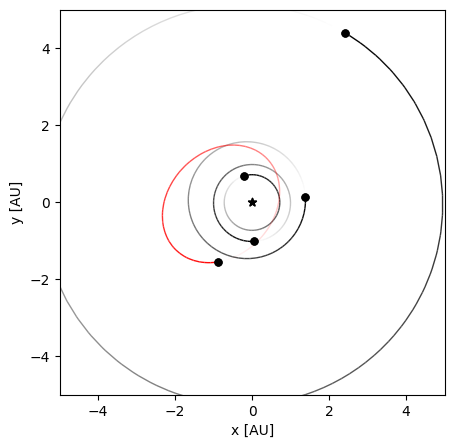

In [17]:
rebound.OrbitPlot(sim, unitlabel="[AU]", xlim=[-5, 5], ylim=[-5,5], color=(N_pl-1)*["black"]+["red"])

In [18]:
x = sim.particles[h(100)].x
y = sim.particles[h(100)].y
z = sim.particles[h(100)].z
vx = sim.particles[h(100)].vx
vy = sim.particles[h(100)].vy
vz = sim.particles[h(100)].vz

In [19]:
N_tp = 20

In [20]:
from numpy.random import normal

In [21]:
for i in range (1, N_tp):
    sim.add(a = np.random.normal(1.8962438188689117, 0.012859095718699871), e = np.random.normal(0.5378407335664053, 0.0017672322187828589), inc = np.radians(np.random.normal(41.35867805379716, 0.0060295872580306)), Omega = np.radians(np.random.normal(63.39172506103105, 0.0023695246243670455)), omega = np.radians(np.random.normal(293.1079621092694, 0.007573706747018616)), M = np.radians(np.random.normal(306.24331451862315, 0.7021402144495281)), r=2.8343E-8, hash=100+i)

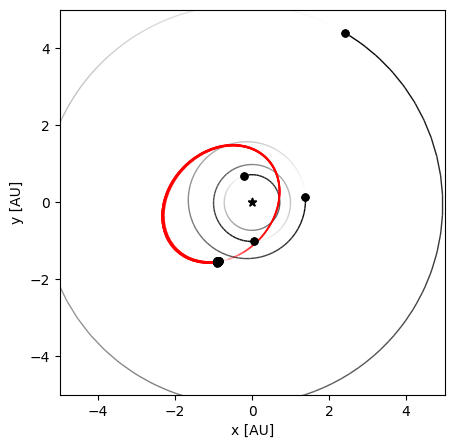

In [22]:
rebound.OrbitPlot(sim, unitlabel="[AU]", xlim=[-5,5], ylim=[-5,5], color=(N_pl-1)*["black"]+N_tp*["red"])

In [23]:
sim.exit_max_distance = 1000
sim.collision = "direct"

In [24]:
def collision_discard_log(sim_pointer, collision, discard_file_name = discard_file_name):
    sim = sim_pointer.contents
    id_p1 = sim.particles[collision.p1].hash.value
    id_p2 = sim.particles[collision.p2].hash.value

    discard_file = open(discard-file_name, "a")

    if id_p1 > id_p2:
        print("Particle {0} collided with {1} at {2} yrs".format(id_p1, id_p2, sim.t))
        print("Particle {0} collided with {1} at {2} yrs".format(id_p1, id_p2, sim.t), file=discard.file)
        print("Removing particle {0}".format(id_p1))
        ToRemove = 1
    else:
        print("Particle {0} collided with {1} at {2} yrs".format(id_p2, id_p1, sim.t))
        print("Particle {0} collided with {1} at {2} yrs".format(id_p2, id_p1, sim.t), file=discard.file)
        print("Removing particle {0}".format(id_p2))
        ToRemove = 2

    discard_file.close()
    return ToRemove

In [25]:
sim.collision_resolve = collision_discard_log

In [26]:
sim.move_to_com()

In [27]:
tend = 50e6

In [28]:
tout = 1000

In [29]:
sim.dt = sim.particles[h(1)].P/25

In [30]:
archive = "archive1.bin"
sim.save_to_file(archive, interval=tout, delete_file=True)

In [31]:
times = np.arange(0, tend, tout)
Nsteps = len(times)

In [ ]:
for i in range(Nsteps):
    try:
        sim.integrate(times[i], exact_finish_time=0)
    except rebound.Escape as error:
        for j in range(sim.N):
            p = sim.particles[j]
            d2 = p.x**2 + p.y**2 + p.z**2
            if d2 > sim.exit_max_distance**2:
                index = j
        pid = sim.particles[index].hash.value
        print("Particle {0:2d} was too far from the Sun at {1:12.6e} yrs".format(pid, sim.t))
        discard_file = open(discard_file_name, "a")
        print("Particle {0:2d} was too far from the Sun at {1:12.6e} yrs".formta(pid, sim.t), file=discard_file)
        discard_file.close()
        sim.remove(index = index)
    print("Time {0:6.3f} Myr-- Fraction Done {1:5.4f} -- # of Clones {2}".format(sim.t/1e6, sim.t/tend, sim.N-N_pl))

    if sim.N <= N_pl:
        print("No more test particles, ending simulation")
        break

Time  0.000 Myr-- Fraction Done 0.0000 -- # of Clones 20
Time  0.001 Myr-- Fraction Done 0.0000 -- # of Clones 20
Time  0.002 Myr-- Fraction Done 0.0000 -- # of Clones 20
Time  0.003 Myr-- Fraction Done 0.0001 -- # of Clones 20
Time  0.004 Myr-- Fraction Done 0.0001 -- # of Clones 20
Time  0.005 Myr-- Fraction Done 0.0001 -- # of Clones 20
Time  0.006 Myr-- Fraction Done 0.0001 -- # of Clones 20
Time  0.007 Myr-- Fraction Done 0.0001 -- # of Clones 20
Time  0.008 Myr-- Fraction Done 0.0002 -- # of Clones 20
Time  0.009 Myr-- Fraction Done 0.0002 -- # of Clones 20
Time  0.010 Myr-- Fraction Done 0.0002 -- # of Clones 20
Time  0.011 Myr-- Fraction Done 0.0002 -- # of Clones 20
Time  0.012 Myr-- Fraction Done 0.0002 -- # of Clones 20
Time  0.013 Myr-- Fraction Done 0.0003 -- # of Clones 20
Time  0.014 Myr-- Fraction Done 0.0003 -- # of Clones 20
Time  0.015 Myr-- Fraction Done 0.0003 -- # of Clones 20
Time  0.016 Myr-- Fraction Done 0.0003 -- # of Clones 20
Time  0.017 Myr-- Fraction Done